# Decision Trees

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from plot_utils import plotAllDfColumns

data = pd.read_csv('decision-tree-input.csv', dtype={'Windy': object})

In [2]:
data

,Outlook,Temperature,Humidity,Windy,Play
0,Rainy,Hot,High,FALSE,No
1,Rainy,Hot,High,TRUE,No
2,Overcast,Hot,High,FALSE,Yes
3,Sunny,Mild,High,FALSE,Yes
4,Sunny,Cool,Normal,FALSE,Yes
5,Sunny,Cool,Normal,TRUE,No
6,Overcast,Cool,Normal,TRUE,Yes
7,Rainy,Mild,Hih,FALSE,No


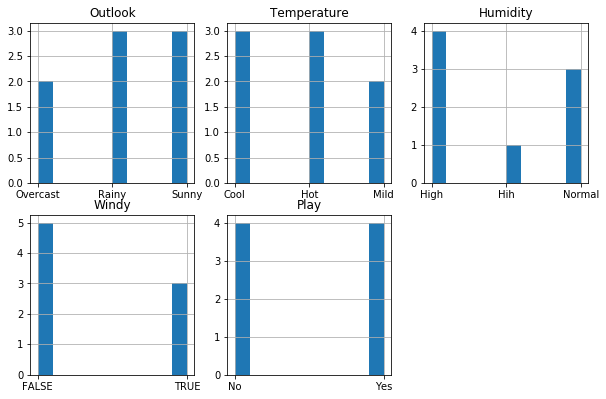

In [3]:
plotAllDfColumns(data)
plt.show()

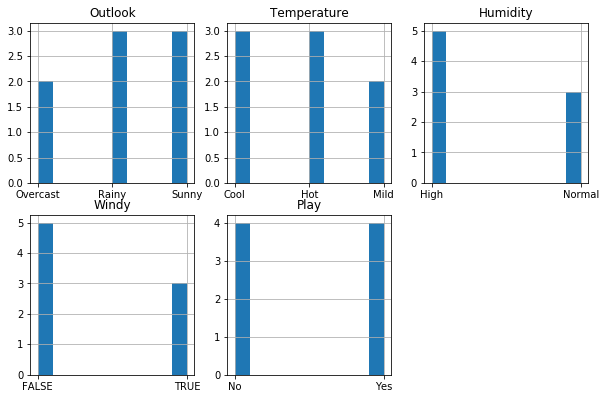

In [4]:
# Looks like we have an extra value 'Hih', let's create a copy of data and fix that
dataCopy = data.copy(deep=True)
dataCopy.loc[7, "Humidity"] = "High"
plotAllDfColumns(dataCopy)

In [5]:
from decision_tree import calculateInformationGain

X = dataCopy.drop(columns=['Play'])
y = dataCopy['Play']
print(calculateInformationGain(X['Outlook'], y))

0.19736702406010306


In [6]:
from decision_tree import buildDecisionTree

dTree = buildDecisionTree(X, y)

Splitting on Outlook
Splitting on Windy
Splitting on Temperature
Splitting on Temperature
Splitting on Temperature
Splitting on Temperature


In [8]:
from decision_tree import predict

print("Should we play golf?", predict(dTree, {'Outlook': 'Rainy', 'Temperature': 'Cool', 'Humidity': 'High', 'Windy': 'FALSE'}))
print("Should we play golf?", predict(dTree, {'Outlook': 'Overcast', 'Temperature': 'Hot', 'Humidity': 'High', 'Windy': 'FALSE'}))

Should we play golf? No
Should we play golf? Yes


In [9]:
from decision_tree import printTree

printTree(dTree)

Outlook      Sunny Windy      FALSE Yes
     TRUE No
     Overcast Yes
     Rainy No
